[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aniket-cfd/machine_learning_exercies/blob/master/.ipynb_checkpoints/ANN%20for%20MNIST-checkpoint.ipynb)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
from sklearn.metrics import r2_score
def plot_results(X, y, lin_reg_model, name):
    plt.figure(figsize=(10,6))
    y_pred = lin_reg_model.predict(X)
    plt.scatter(y_pred,y, alpha=0.2)
    plt.plot([y_pred.min(),y_pred.max()],[y.min(),y.max()],'k')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title("R2 Score = " +str(r2_score(lin_reg_model.predict(X), y)))
    plt.savefig(name+'.svg', format='svg')

In [43]:
casp = pd.read_csv("CASP.csv")
casp.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler_pipeline = Pipeline([
    ("minmax_scaler", MinMaxScaler()),
#     ("pca", PCA(n_components=0.99))
])
casp_scaled = scaler_pipeline.fit_transform(casp)

from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(casp_scaled[:,1:],casp_scaled[:,0], test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=X_train[0,:].shape))
model.add(keras.layers.Dense(3000, activation='relu'))
model.add(keras.layers.Dense(2500, activation='relu'))
model.add(keras.layers.Dense(2000, activation='relu'))
model.add(keras.layers.Dense(1500, activation='relu'))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 3000)              30000     
_________________________________________________________________
dense_17 (Dense)             (None, 2500)              7502500   
_________________________________________________________________
dense_18 (Dense)             (None, 2000)              5002000   
_________________________________________________________________
dense_19 (Dense)             (None, 1500)              3001500   
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
dense_21 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_22 (Dense)             (None, 100)              

In [48]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=0.03))

In [49]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("casp.h5", save_best_only=True)

In [51]:
history = model.fit(X_train, y_train, epochs=300, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

Train on 22407 samples, validate on 9604 samples
Epoch 1/300
22407/22407 [==============================] - 45s 2ms/sample - loss: 0.0546 - val_loss: 0.0538
Epoch 2/300
22407/22407 [==============================] - 44s 2ms/sample - loss: 0.0542 - val_loss: 0.0962
Epoch 3/300
22407/22407 [==============================] - 45s 2ms/sample - loss: 0.0541 - val_loss: 0.0524
Epoch 4/300
22407/22407 [==============================] - 46s 2ms/sample - loss: 0.0538 - val_loss: 0.0543
Epoch 5/300
22407/22407 [==============================] - 46s 2ms/sample - loss: 0.0537 - val_loss: 0.0633
Epoch 6/300
22407/22407 [==============================] - 47s 2ms/sample - loss: 0.0537 - val_loss: 0.0574
Epoch 7/300
22407/22407 [==============================] - 47s 2ms/sample - loss: 0.0536 - val_loss: 0.0519
Epoch 8/300
22407/22407 [==============================] - 48s 2ms/sample - loss: 0.0533 - val_loss: 0.0547
Epoch 9/300
22407/22407 [==============================] - 48s 2ms/sample - loss: 0.053

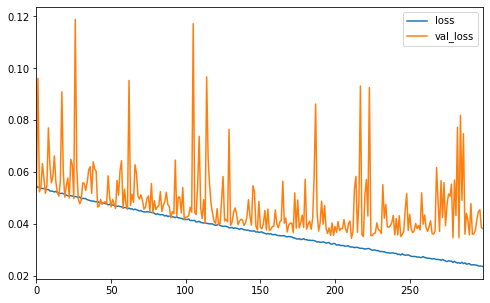

In [52]:
pd.DataFrame(history.history).plot(figsize=(8,5))

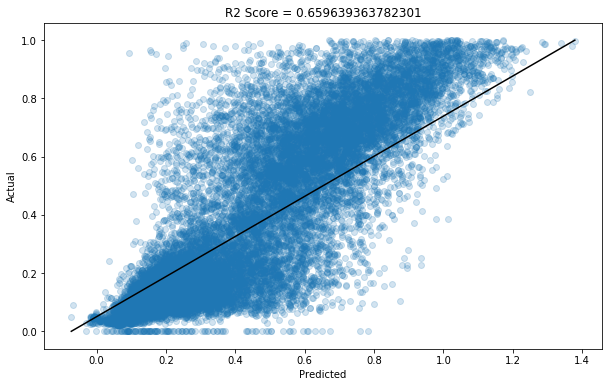

In [53]:
plot_results(X_train, y_train, model, "ANN")

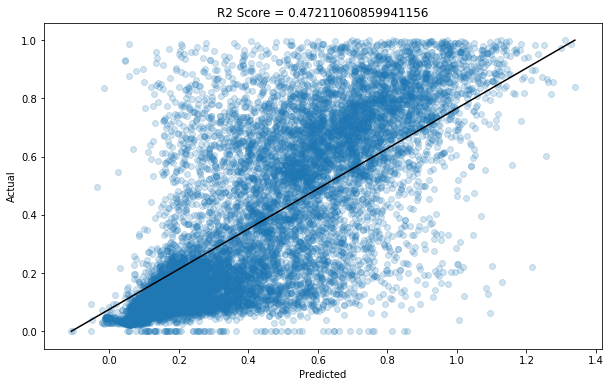

In [54]:
plot_results(X_test, y_test, model, "ANN_test")